# Get training logs

In [9]:
import os
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

def get_log(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    tags = event_acc.Tags()['scalars']
    
    # print(tags)
    # raise Exception('stop')
    log = {'step': [], 'ep_rew_mean': []}
    
    for scalar_event in event_acc.Scalars('rollout/ep_rew_mean'):
        log['step'].append(scalar_event.step)
        log['ep_rew_mean'].append(scalar_event.value)
        
    log = {key: np.array(values) for key, values in log.items()}
    # sub sample in steps of 1e6
    indices = log['step'] % 1e6 == 0
    log = {key: values[indices] for key, values in log.items()}
    # get the highest value and corresponding step
    max_index = np.argmax(log['ep_rew_mean'])
    log['max_ep_rew_mean'] = log['ep_rew_mean'][max_index]
    log['max_step'] = log['step'][max_index]
    return log

def reward_plot(log_dir, **kwargs):
    log = get_log(log_dir)
    plt.plot(log['step'], log['ep_rew_mean'], **kwargs)
    plt.scatter(log['max_step'], log['max_ep_rew_mean'], **kwargs)
    
def get_best_model(log_dir):
    log = get_log(log_dir)
    print('highest reward:', log['max_ep_rew_mean'], 'at step:', log['max_step'])
    model_dir = log_dir
    model_dir = model_dir.replace('logs', 'models')
    model_dir = model_dir[:-2]
    path_best_model = model_dir + f'/{log["max_step"]}.zip'
    print('best model:', path_best_model)
    return path_best_model

# Boxplots of the mean episode reward of all training runs

/tmp/ipykernel_1231473/2532323473.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


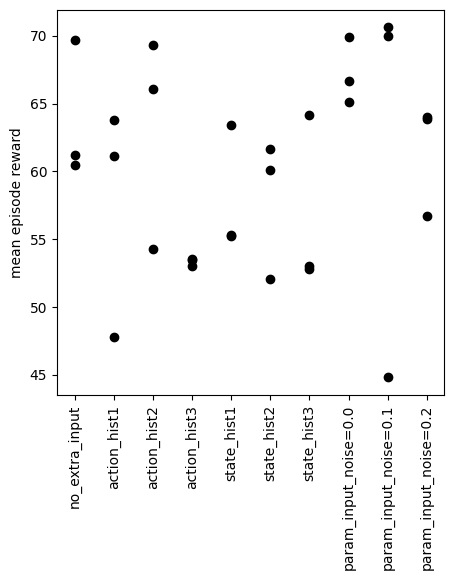

In [29]:
# box plots of the best models
fig, ax = plt.subplots(1,1, figsize=(5,5))

# no action hist
log1 = get_log('logs/nn_size_comparison/run0_64_64_64_0')
log2 = get_log('logs/nn_size_comparison/run1_64_64_64_0')
log3 = get_log('logs/nn_size_comparison/run2_64_64_64_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[0], widths=0.4)
ax.scatter([0]*3, rew, color='k')
# action hist 1
log1 = get_log('logs/input_comparison/run0_action_history1_0')
log2 = get_log('logs/input_comparison/run1_action_history1_0')
log3 = get_log('logs/input_comparison/run2_action_history1_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[1], widths=0.4)
ax.scatter([1]*3, rew, color='k')
# action hist 2
log1 = get_log('logs/input_comparison/run0_action_history2_0')
log2 = get_log('logs/input_comparison/run1_action_history2_0')
log3 = get_log('logs/input_comparison/run2_action_history2_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[2], widths=0.4)
ax.scatter([2]*3, rew, color='k')
# action hist 3
log1 = get_log('logs/input_comparison/run0_action_history3_0')
log2 = get_log('logs/input_comparison/run1_action_history3_0')
log3 = get_log('logs/input_comparison/run2_action_history3_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[3], widths=0.4)
ax.scatter([3]*3, rew, color='k')
# state hist 1
log1 = get_log('logs/input_comparison/run0_state_history1_0')
log2 = get_log('logs/input_comparison/run1_state_history1_0')
log3 = get_log('logs/input_comparison/run2_state_history1_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[4], widths=0.4)
ax.scatter([4]*3, rew, color='k')
# state hist 2
log1 = get_log('logs/input_comparison/run0_state_history2_0')
log2 = get_log('logs/input_comparison/run1_state_history2_0')
log3 = get_log('logs/input_comparison/run2_state_history2_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[5], widths=0.4)
ax.scatter([5]*3, rew, color='k')
# state hist 3
log1 = get_log('logs/input_comparison/run0_state_history3_0')
log2 = get_log('logs/input_comparison/run1_state_history3_0')
log3 = get_log('logs/input_comparison/run2_state_history3_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[6], widths=0.4)
ax.scatter([6]*3, rew, color='k')
# param input noise=0.0
log1 = get_log('logs/input_comparison/run0_param_input_noise=00_0')
log2 = get_log('logs/input_comparison/run1_param_input_noise=00_0')
log3 = get_log('logs/input_comparison/run2_param_input_noise=00_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[7], widths=0.4)
ax.scatter([7]*3, rew, color='k')
# param input noise=0.1
log1 = get_log('logs/input_comparison/run0_param_input_noise=01_0')
log2 = get_log('logs/input_comparison/run1_param_input_noise=01_0')
log3 = get_log('logs/input_comparison/run2_param_input_noise=01_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[8], widths=0.4)
ax.scatter([8]*3, rew, color='k')
# param input noise=0.2
log1 = get_log('logs/input_comparison/run0_param_input_noise=02_0')
log2 = get_log('logs/input_comparison/run1_param_input_noise=02_0')
log3 = get_log('logs/input_comparison/run2_param_input_noise=02_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
ax.boxplot(rew, positions=[9], widths=0.4)
ax.scatter([9]*3, rew, color='k')

ax.set_xticks(range(10))
ax.set_xticklabels(['no_extra_input', 'action_hist1', 'action_hist2', 'action_hist3', 'state_hist1', 'state_hist2', 'state_hist3', 'param_input_noise=0.0', 'param_input_noise=0.1', 'param_input_noise=0.2'], rotation=90)
ax.set_ylabel('mean episode reward')
fig.show()

# Simulate models

In [27]:
from quad_race_env import *
from randomization import *
from stable_baselines3 import PPO
from quadcopter_animation import animation

#  ANIMATION FUNCTION
def animate_policy(model, env, **kwargs):
    env.reset()
    def run():
        actions, _ = model.predict(env.states)  
        states, rewards, dones, infos = env.step(actions)  
        return env.render()
    animation.view(run, gate_pos=env.gate_pos, gate_yaw=env.gate_yaw, **kwargs)
    
def animate_policy_2(model1, model2, env1, env2, **kwargs):
    env1.reset()
    env2.reset()
    def run():
        actions1, _ = model1.predict(env1.states)
        actions2, _ = model2.predict(env2.states)
        
        _, _, _, _ = env1.step(actions1)
        _, _, _, _ = env2.step(actions2)
        
        out1 = env1.render()
        # b, g, r
        out1['color'] = [(255.,0.,0.)]*env1.num_envs
        out2 = env2.render()
        out2['color'] = [(0.,0.,255.)]*env2.num_envs
        
        out = {}
        for key in out1.keys():
            out[key] = np.concatenate([out1[key], out2[key]])
        return out    
    animation.view(run, gate_pos=env1.gate_pos, gate_yaw=env1.gate_yaw, **kwargs)
    

In [28]:
log_path = 'logs/nn_size_comparison/run1_64_64_64_0'
log_path = 'logs/fixed_5inch/run0_64_64_64_0'

model = PPO.load(get_best_model(log_path))

env = Quadcopter3DGates(
    num_envs=100,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization_fixed_params_5inch,
    gates_ahead=1,
    initialize_at_random_gates=False,
    pause_if_collision=True,
)
   
animate_policy(model, env)

highest reward: 100.88052368164062 at step: 85000000
best model: models/fixed_5inch/run0_64_64_64/85000000.zip


/home/robin/miniconda3/envs/minimal/lib/python3.10/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:77: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")


In [4]:
log_path1 = 'logs/nn_size_comparison/run1_64_64_64_0'
log_path2 = 'logs/fixed_5inch/run0_64_64_64_0'

model1 = PPO.load(get_best_model(log_path1))
model2 = PPO.load(get_best_model(log_path2))

randomization=randomization_fixed_params_5inch

env1 = Quadcopter3DGates(
    num_envs=1,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization,
    gates_ahead=1,
    initialize_at_random_gates=False,
    pause_if_collision=True,
)
env2 = Quadcopter3DGates(
    num_envs=1,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization,
    gates_ahead=1,
    initialize_at_random_gates=False,
    pause_if_collision=True,
)
   
animate_policy_2(model1, model2, env1, env2)

highest reward: 69.66938018798828 at step: 98000000
best model: models/nn_size_comparison/run1_64_64_64/98000000.zip
highest reward: 100.88052368164062 at step: 85000000
best model: models/fixed_5inch/run0_64_64_64/85000000.zip
